# Machine Learning Model on Real Estate Correlation

In this file, we will use several machine learning algorithms to evaluate whether changes in the house prices in cities outside the GTA correlate to changes in the house prices in the GTA.

In [30]:
#Importing Libraries
import numpy as np
import pandas as pd
# import hvplot.pandas
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt

## Data Manipulation

In [2]:
def format_function(df):
    df = df.reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df
# convert to datetime
# dataframe_name['Date'] = pd.to_datetime(dataframe_name['date'])
# dataframe_name.set_index('Date', inplace=True)
# dataframe_name = dataframe_name.drop(columns=["date", "realtime_start", "realtime_end"]).sort_index()
# dataframe_name['value'] = pd.to_numeric(dataframe_name['value'],errors='coerce')
# return dataframe_name

In [3]:
# Read csv contains house prices in Barrie
df_barrie = pd.read_csv("Data/House_price_Barrie.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop null values
df_barrie.dropna(inplace=True)
df_barrie = df_barrie[["Composite_Benchmark_SA_Barrie"]]
df_barrie = df_barrie.rename(columns={"Composite_Benchmark_SA_Barrie": "Barrie Composite House Price"})
df_barrie.head()
#convert index to datetime
# df = df.reset_index()
# df['Date'] = pd.to_datetime(df['Date'])
# df.head()

,Barrie Composite House Price
Date,
2005-01-01,210200.0
2005-02-01,212300.0
2005-03-01,214100.0
2005-04-01,216100.0
2005-05-01,217200.0


In [4]:
# Read csv contains house prices in Hamilton
df_hamilton = pd.read_csv("Data/House_price_Hamilton.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop null values
df_hamilton.dropna(inplace=True)
df_hamilton = df_hamilton[["Composite_Benchmark_SA_Hamilton"]]
df_hamilton = df_hamilton.rename(columns={"Composite_Benchmark_SA_Hamilton": "Hamilton Composite House Price"})
df_hamilton.tail()

,Hamilton Composite House Price
Date,
2020-05-01,656000.0
2020-06-01,672600.0
2020-07-01,685100.0
2020-08-01,702000.0
2020-09-01,717700.0


In [5]:
# Read csv contains house prices in Kitchener
df_kitchener = pd.read_csv("Data/House_price_Kitchener.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop null values
df_kitchener.dropna(inplace=True)
df_kitchener = df_kitchener[["Composite_Benchmark_SA_Kitchener"]]
df_kitchener = df_kitchener.rename(columns={"Composite_Benchmark_SA_Kitchener": "Kitchener Composite House Price"})
df_kitchener.tail()

,Kitchener Composite House Price
Date,
2020-05-01,548800.0
2020-06-01,561100.0
2020-07-01,572000.0
2020-08-01,583700.0
2020-09-01,588800.0


In [6]:
# Read csv contains house prices in Niagara
df_niagara = pd.read_csv("Data/House_price_Niagara.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop null values
df_niagara.dropna(inplace=True)
df_niagara = df_niagara[["Composite_Benchmark_SA_Niagara"]]
df_niagara = df_niagara.rename(columns={"Composite_Benchmark_SA_Niagara": "Niagara Composite House Price"})
df_niagara.tail()

,Niagara Composite House Price
Date,
2020-05-01,451700.0
2020-06-01,459700.0
2020-07-01,469400.0
2020-08-01,481300.0
2020-09-01,490300.0


In [7]:
# Read csv contains house prices in Peterborough
df_pete = pd.read_csv("Data/House_price_Peterborough.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop null values
df_pete.dropna(inplace=True)
df_pete = df_pete[["Composite_Benchmark_SA_Peterborough"]]
df_pete = df_pete.rename(columns={"Composite_Benchmark_SA_Peterborough": "Peterborough Composite House Price"})
df_pete.tail()

,Peterborough Composite House Price
Date,
2020-05-01,440500.0
2020-06-01,445700.0
2020-07-01,456000.0
2020-08-01,471100.0
2020-09-01,484200.0


In [8]:
# Read csv contains house prices in GTA:
df_gta = pd.read_csv("Data/House_price_GTA.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop null values
df_gta.dropna(inplace=True)
df_gta = df_gta[["Composite_Benchmark_SA_GTA"]]
df_gta = df_gta.rename(columns={"Composite_Benchmark_SA_GTA": "GTA Composite House Price"})
df_gta.tail()

,GTA Composite House Price
Date,
2020-05-01,860400.0
2020-06-01,857500.0
2020-07-01,878100.0
2020-08-01,889800.0
2020-09-01,899500.0


## Concat Dataframes

In [9]:
# concat data
master_df = pd.concat([df_gta, df_barrie, df_hamilton, df_kitchener, df_niagara, df_pete], axis="columns", join='inner')
master_df.tail()

,GTA Composite House Price,Barrie Composite House Price,Hamilton Composite House Price,Kitchener Composite House Price,Niagara Composite House Price,Peterborough Composite House Price
Date,,,,,,
2020-05-01,860400.0,512900.0,656000.0,548800.0,451700.0,440500.0
2020-06-01,857500.0,520300.0,672600.0,561100.0,459700.0,445700.0
2020-07-01,878100.0,525900.0,685100.0,572000.0,469400.0,456000.0
2020-08-01,889800.0,537800.0,702000.0,583700.0,481300.0,471100.0
2020-09-01,899500.0,549700.0,717700.0,588800.0,490300.0,484200.0


In [10]:
# setting x-variables
x_var_list = ['Barrie Composite House Price', 
              'Hamilton Composite House Price', 
              'Kitchener Composite House Price', 
              'Niagara Composite House Price', 
              'Peterborough Composite House Price']
master_df[x_var_list].tail()

,Barrie Composite House Price,Hamilton Composite House Price,Kitchener Composite House Price,Niagara Composite House Price,Peterborough Composite House Price
Date,,,,,
2020-05-01,512900.0,656000.0,548800.0,451700.0,440500.0
2020-06-01,520300.0,672600.0,561100.0,459700.0,445700.0
2020-07-01,525900.0,685100.0,572000.0,469400.0,456000.0
2020-08-01,537800.0,702000.0,583700.0,481300.0,471100.0
2020-09-01,549700.0,717700.0,588800.0,490300.0,484200.0


In [11]:
# Shift DataFrame values by 1 = this will shift data points forward one month so
# that we are using previous months data to predict current month y variable.
master_df[x_var_list] = master_df[x_var_list].shift(1)
master_df[x_var_list].tail()

,Barrie Composite House Price,Hamilton Composite House Price,Kitchener Composite House Price,Niagara Composite House Price,Peterborough Composite House Price
Date,,,,,
2020-05-01,509600.0,651700.0,523500.0,454300.0,440900.0
2020-06-01,512900.0,656000.0,548800.0,451700.0,440500.0
2020-07-01,520300.0,672600.0,561100.0,459700.0,445700.0
2020-08-01,525900.0,685100.0,572000.0,469400.0,456000.0
2020-09-01,537800.0,702000.0,583700.0,481300.0,471100.0


In [12]:
# Drop NAs and replace positive/negative infinity values
master_df.dropna(subset=x_var_list, inplace=True)
master_df = master_df.replace([np.inf, -np.inf], np.nan)
master_df.isnull().sum()

GTA Composite House Price             0
Barrie Composite House Price          0
Hamilton Composite House Price        0
Kitchener Composite House Price       0
Niagara Composite House Price         0
Peterborough Composite House Price    0
dtype: int64

## Split data into training and testing datasets

In [13]:
# Calculate the 70 percentile to split data into train/test 
print(len(master_df))
188*0.7
master_df.iloc[131]
# 242*0.7
# master_df.iloc[170]

188


GTA Composite House Price             586000.0
Barrie Composite House Price          365800.0
Hamilton Composite House Price        426200.0
Kitchener Composite House Price       328100.0
Niagara Composite House Price         254300.0
Peterborough Composite House Price    269000.0
Name: 2016-01-01 00:00:00, dtype: float64

In [14]:
# Construct training start and end dates
training_start = master_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2016-01-01'

# Construct testing start and end dates
testing_start =  '2016-02-01'
testing_end = master_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2005-02-01
Training End: 2016-01-01
Testing Start: 2016-02-01
Testing End: 2020-09-01


In [15]:
# Construct the x train and y train datasets
X_train = master_df[x_var_list][training_start:training_end]
y_train = master_df['GTA Composite House Price'][training_start:training_end]

In [16]:
# Construct the x test and y test datasets
X_test = master_df[x_var_list][testing_start:testing_end]
y_test = master_df['GTA Composite House Price'][testing_start:testing_end]

y_test.tail()

Date
2020-05-01    860400.0
2020-06-01    857500.0
2020-07-01    878100.0
2020-08-01    889800.0
2020-09-01    899500.0
Name: GTA Composite House Price, dtype: float64

## Scale data

In [17]:
# Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Build the model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
model.score(X_train_scaled, y_train)

0.9948561417345968

In [20]:
model.coef_

array([-62820.46029055, 342625.00623666,  58033.94831429, -90742.62840862,
        34242.37997169])

In [21]:
model.intercept_

303942.339732471

In [28]:
# Make predictions of y values from the x test dataset
predictions = model.predict(X_test_scaled)

# Assemble actual y data (Y_test) with predicted y data into two columns in a dataframe to compare:
Results = y_test.to_frame()
Results["Model Predicted Value"] = predictions
Results.tail(20)

,GTA Composite House Price,Model Predicted Value
Date,,
2019-02-01,772400.0,778014.379095
2019-03-01,774900.0,787274.922270
2019-04-01,780300.0,788088.927707
2019-05-01,784700.0,820969.028899
2019-06-01,790700.0,805875.807253
2019-07-01,797000.0,814522.972981
2019-08-01,802300.0,813185.400184
2019-09-01,807200.0,824631.863425
2019-10-01,813800.0,828022.794637


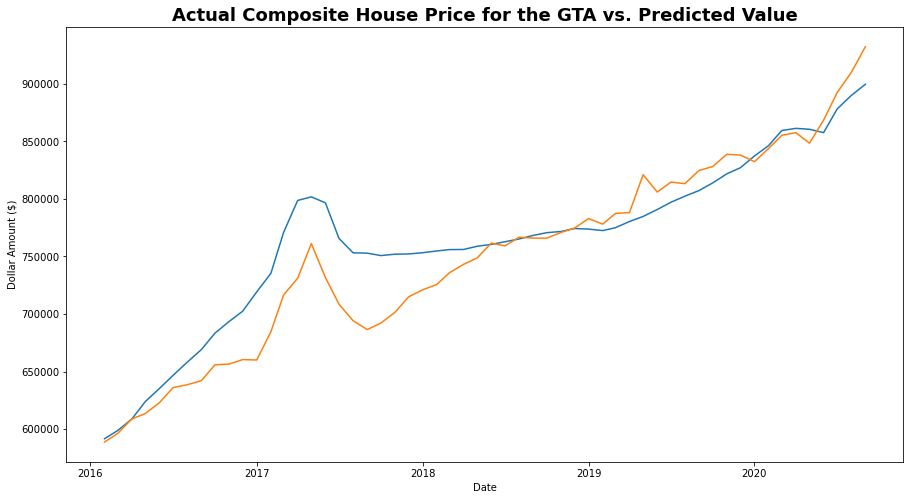

In [37]:
# Plotting the results
plt.subplots(figsize=(15,8))
plt.plot(Results)

# plt.legend(["Random Forest Algo Strategy Return", 
#             "Benchmark Return",
#             "Gradient Boosting Algo Strategy Return", 
#             "SMOTE Algo Strategy Return",
#            ], 
#            prop={'size': 16})
plt.xlabel("Date")
plt.ylabel("Dollar Amount ($)")
plt.title(f"Actual Composite House Price for the GTA vs. Predicted Value", fontdict={'fontweight':'bold', 'fontsize':'18'})
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))

Coefficient of determination: 0.82


In [27]:
print('Mean Squared Error: %.2f'
      % mean_squared_error(y_test, predictions))

Mean Squared Error: 913518615.53


ValueError: x and y must be the same size

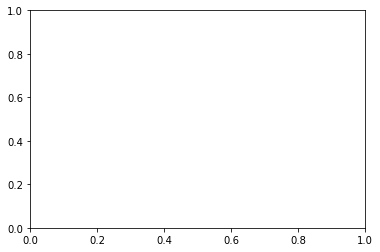

In [31]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.scatter(X_test_scaled, y_test)
plt.plot(X_test_scaled, predicted_y_values, color='red')